In [38]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

Read in train data:

In [26]:
url = 'https://raw.githubusercontent.com/thaonguyyen/project_chd/main/cleaned_train_data.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0.1,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,85.0,0
3,3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [39]:
def performance(y_test,y_hat): # Sample code to compute classifier performance
    tab = pd.crosstab(np.array(y_hat),np.array(y_test)) # Compute confusion matrix
    #
    # Get entries from the confusion matrix:
    tp = tab.iloc[0,0]
    tn = tab.iloc[1,1]
    fp = tab.iloc[0,1]
    fn = tab.iloc[1,0]
    tot = tp+tn+fp+fn
    #
    # Compute performance statistics:
    acc = (tp+tn)/tot
    spec = tn/(tp+fn)
    sens = tp/(tp+fn)
    mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    #
    # Return a dictionary including the confusion matrix and metrics:
    return({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})

Decision Trees code:

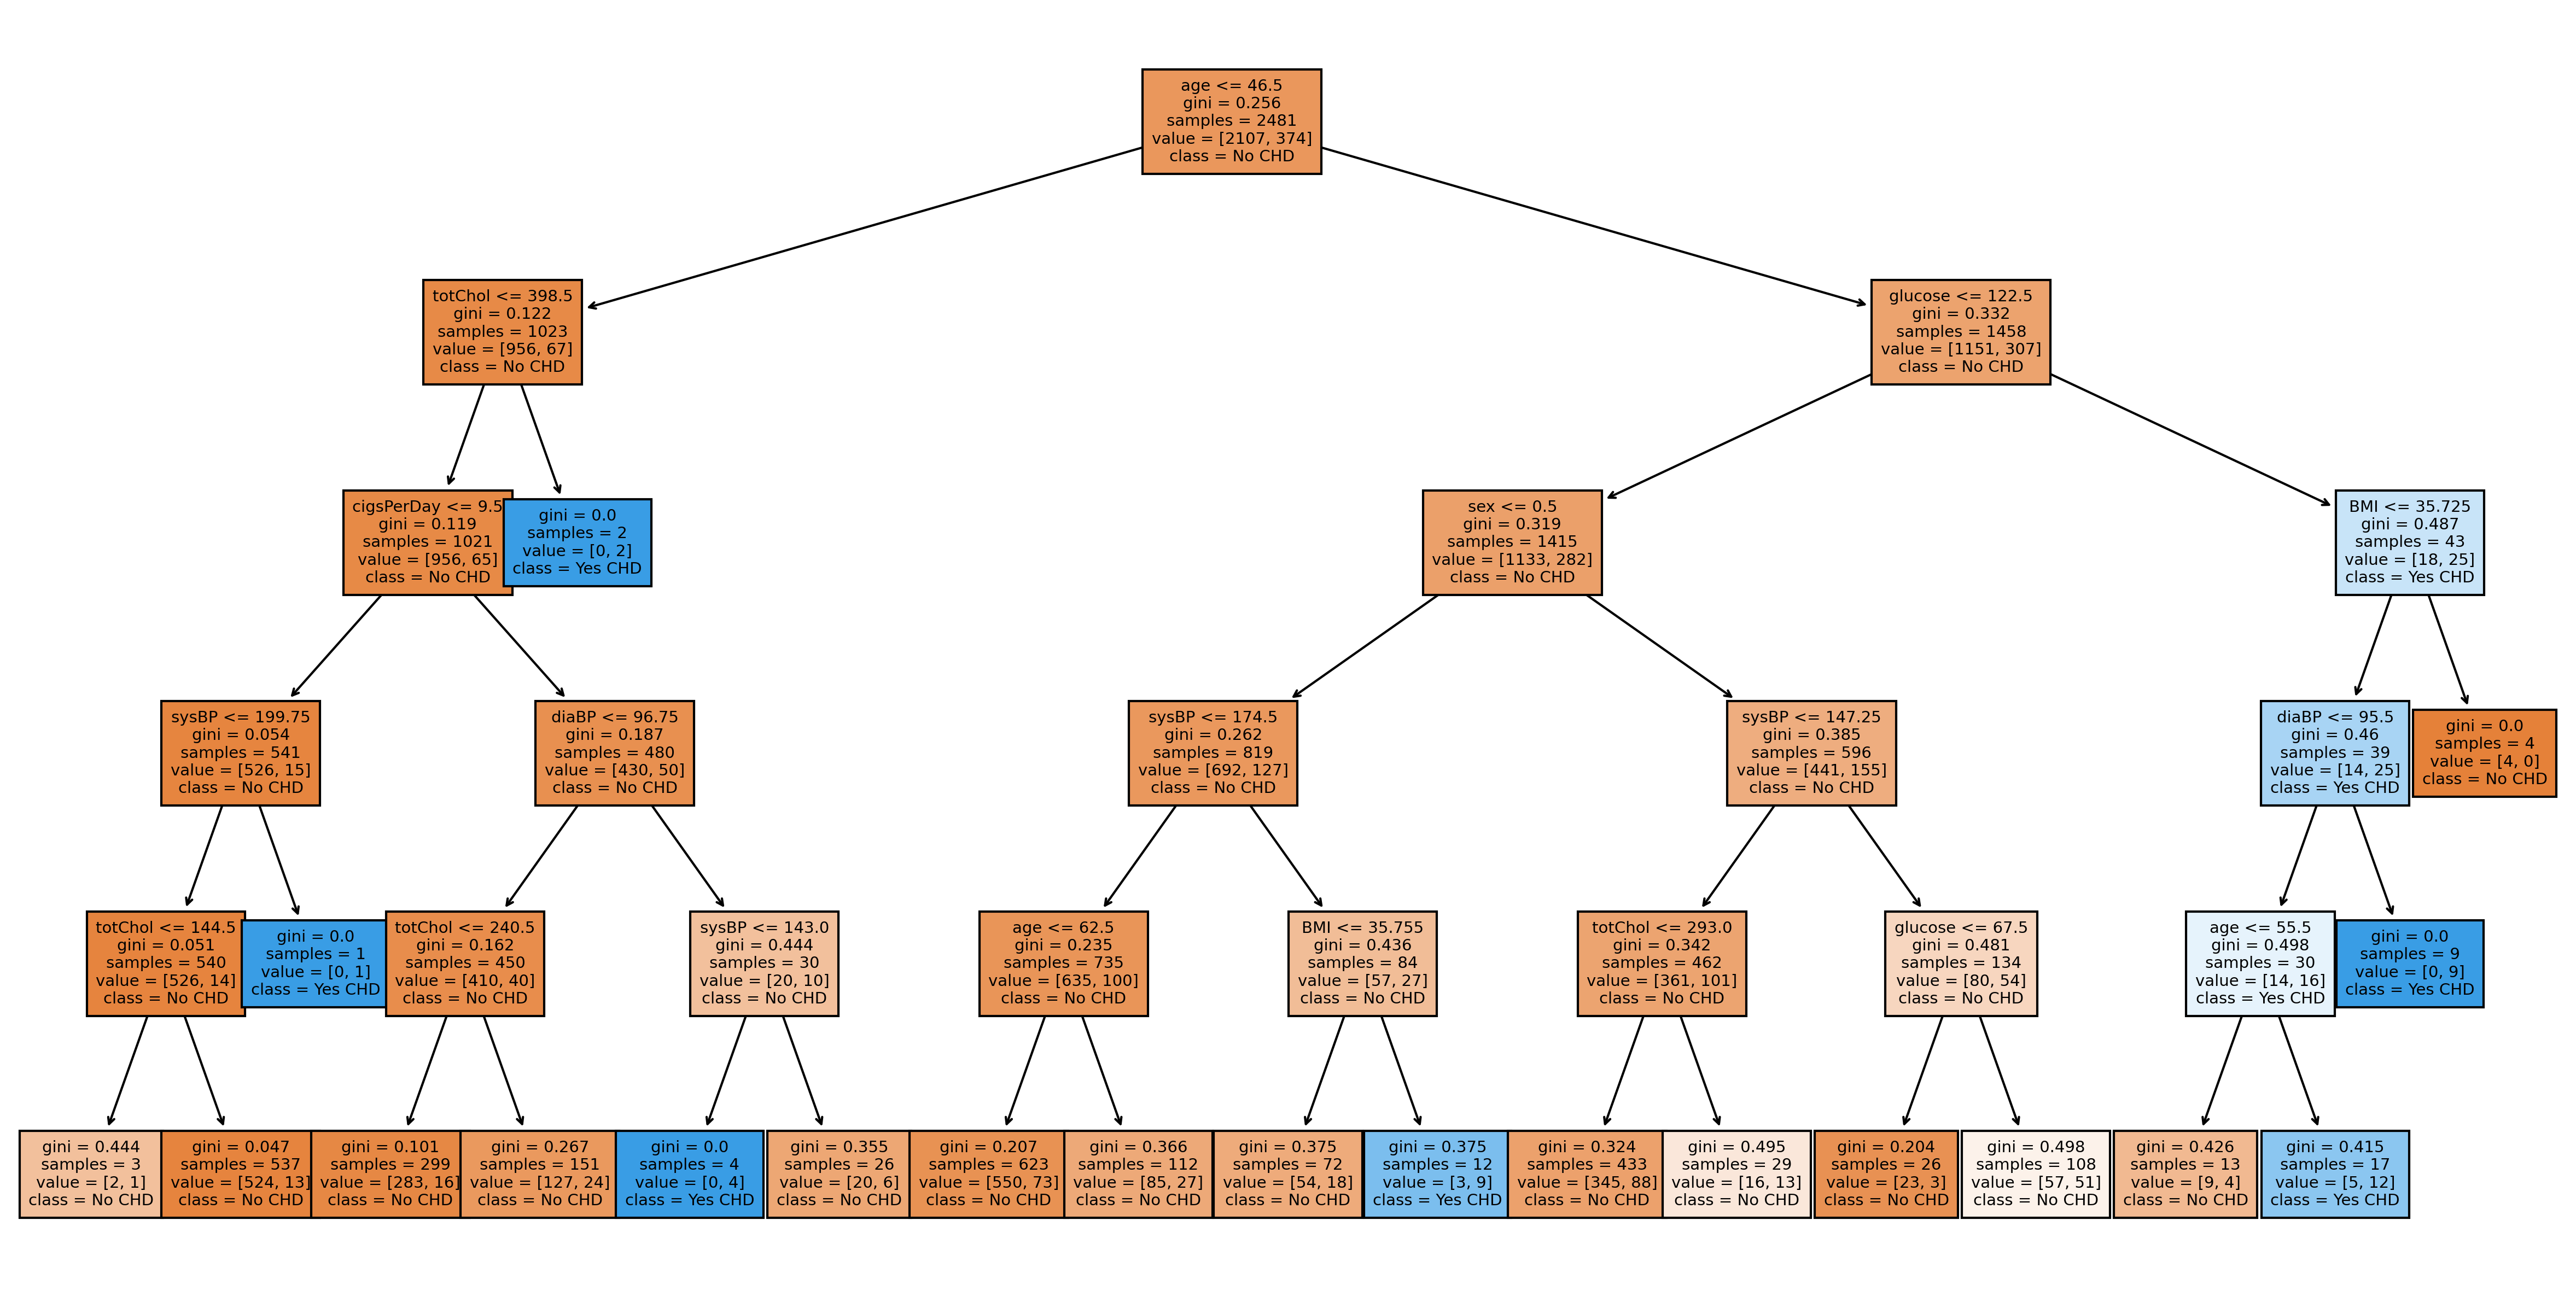

{'confusion_matrix': col_0    0   1
row_0         
0      518  96
1        6   1, 'accuracy': 0.8357487922705314, 'specificity': 0.0019083969465648854, 'sensitivity': 0.9885496183206107, 'mcc': -0.003924129014655134}


In [47]:
# split data into features and target
X = df[['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]  # Features
y = df['TenYearCHD']

# get training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# plot decision tree
model = tree.DecisionTreeClassifier(max_depth=5) # fit the classifier
cart = model.fit(X_train, y_train)
plt.figure(figsize=(20,10), dpi=300)
tree.plot_tree(model, filled=True, fontsize=7, feature_names=X.columns, class_names=['No CHD', 'Yes CHD'])
plt.show()

# make predictions on the Test Set
y_hat_cart = cart.predict(X_test)

# compute performance:
perf_cart = performance(y_test,y_hat_cart)
print(perf_cart)